In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


def get_rating_from_tweet(rate):
    if '/10' in rate:
        indx = rate.index('/10')
        rating = rate[indx-2:indx]
        return rating
    else:
        return 'n/a'
    
def to_timestamp(date):
    return date.timestamp()

In [9]:
tweets = pd.read_csv('dog_rates_tweets.csv', parse_dates=['created_at'])

In [10]:
rates = tweets[tweets['text'].str.contains('/10')]
get_rating = np.vectorize(get_rating_from_tweet)

In [26]:
get_rating = np.vectorize(get_rating_from_tweet)

rates2 = rates.copy(deep=True)
rates2['rating'] = get_rating(rates2['text'])
rates2 = rates2[rates2['rating'].str.isdigit()]
rates2 = rates2._convert(numeric=True)
rates2['rating'] = rates2['rating'].astype('float')
rates2 = rates2[rates2['rating']<=25]
rates2 = rates2.reset_index(drop=True)

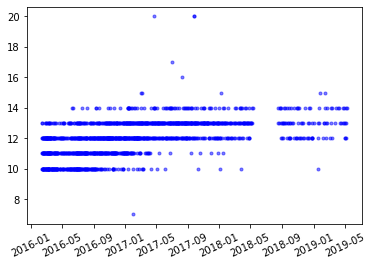

In [27]:
plt.xticks(rotation=25)
plt.plot(rates2['created_at'], rates2['rating'], 'b.', alpha=0.5)
plt.show()

In [28]:
rates2['timestamp'] = rates2['created_at'].apply(to_timestamp)
fit = stats.linregress(rates2['timestamp'], rates2['rating'])
rates2['prediction'] = rates2['timestamp']*fit.slope+fit.intercept
rates2

,id,created_at,text,rating,timestamp,prediction
0,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525910e+09,13.103166
1,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525797e+09,13.100102
2,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525735e+09,13.098427
3,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525394e+09,13.089189
4,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525285e+09,13.086255
...,...,...,...,...,...,...
1572,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14.0,1.535056e+09,13.350817
1573,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14.0,1.534957e+09,13.348136
1574,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13.0,1.534811e+09,13.344173
1575,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...,14.0,1.534351e+09,13.331720


In [29]:
fit.slope, fit.intercept

(2.7076907233592084e-08, -28.213750702371698)

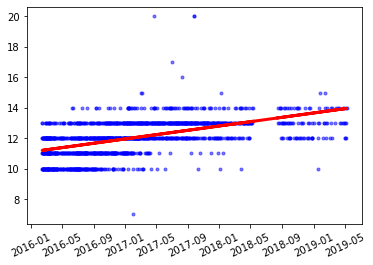

In [30]:
plt.xticks(rotation=25)
plt.plot(rates2['created_at'], rates2['rating'], 'b.', alpha=0.5)
plt.plot(rates2['created_at'], rates2['prediction'], 'r-', linewidth=3)
plt.show()